In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import numpy as np
from matplotlib import pyplot as plt
import igraph

import pythd

In [2]:
# Function to create a dataset of a circle at a given point
def create_circle(c=np.array([0.0, 0.0]), r=1.0, noise=0.0, n=20):
    theta = np.linspace(0.0, 2.0*np.pi, num=n, endpoint=False)
    c = np.array(c)
    
    x = c[0] + r*np.cos(theta) + np.random.normal(scale=noise, size=theta.shape)
    y = c[1] + r*np.sin(theta) + np.random.normal(scale=noise, size=theta.shape)
    return np.array([x, y]).T

def create_disk(c=np.array([0.0, 0.0]), r=1.0, noise=0.0, n=20):
    theta = np.linspace(0.0, 2.0*np.pi, num=n/2, endpoint=False)
    rs = np.linspace(0.0, r, num=n/2, endpoint=False)
    c = np.array(c)
    res = ()
    for rad in rs:
        x = c[0] + rad*np.cos(theta) + np.random.normal(scale=noise, size=theta.shape)
        y = c[1] + rad*np.sin(theta) + np.random.normal(scale=noise, size=theta.shape)
        arr = np.array([x, y]).T
        res = res + (arr,)
    return np.concatenate(res)

C:\Users\Anomalocaris\Anaconda2\envs\pytorch\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Anomalocaris\Anaconda2\envs\pytorch\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


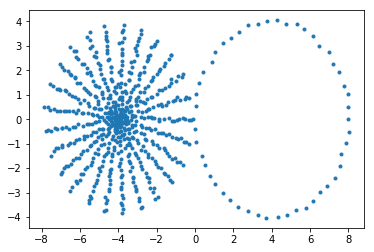

In [3]:
# Create and show two circles with some noise
circ1 = create_disk(c=[-4.0, 0.0], r=4.0, noise=0.05, n=50)
circ2 = create_circle(c=[4.0, 0.0], r=4.0, noise=0.05, n=50)
dataset = np.concatenate((circ1, circ2))
plt.plot(dataset[:, 0], dataset[:, 1], ".")
plt.show()

In [4]:
# Setup MAPPER
filt = pythd.filter.ComponentFilter(0) # filter: x component
f_x = filt(dataset)
cover = pythd.cover.IntervalCover1D.EvenlySpacedFromValues(f_x, 15, 0.51)
clustering = pythd.clustering.HierarchicalClustering()

In [5]:
# Run MAPPER
mapper = pythd.mapper.MAPPER(filter=filt, cover=cover, clustering=clustering)
res = mapper.run(dataset)

In [6]:
ks = res.compute_k_skeleton(k=2)
print(ks)

({0: {480, 455}, 1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 203, 204, 205, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217, 218, 219, 220, 221, 229, 230, 231, 232, 233, 234, 235,

C:\Users\Anomalocaris\Anaconda2\envs\pytorch\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


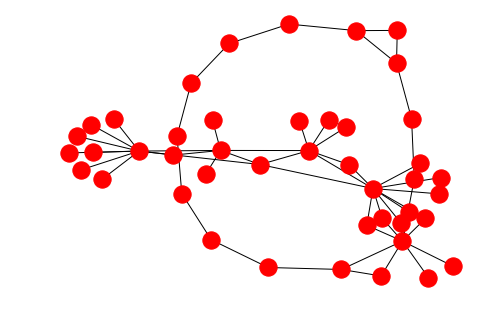

In [7]:
import networkx as nx
g = res.get_networkx_network()
nx.draw(g)